<div style="border:solid steelblue 1px; padding: 20px">
    
<font size="4"><p style="text-align:center"><b>Отток клиентов</b></p></font>

</div>

# Содержание
1. [Описание данных](#Описание_данных)
2. [EDA](#EDA)
3. [Исследование задачи](#Исследование_задачи) 
4. [Борьба с дисбалансом](#Борьба_с_дисбалансом) 
5. [Взвешивание классов](#Взвешивание_классов) 
5. [Увеличение выборки](#Увеличение_выборки) 
5. [Уменьшение выборки](#Уменьшение_выборки) 
6. [Тестирование модели](#Тестирование_модели) 
7. [Вывод](#Вывод)

<div class="alert alert-info">
<font size="4", color = "black"><a name="Описание_данных"><h3>Описание данных</h3></a></font>
    <br /> 
    <font size="3", color = "black">

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
📌 Одна из проблем в сфере услуг – отток клиентов. Многие клиекты покупают абонементы, но перестают посещать заведения, и отменяют их до истечения срока. Аднимистрация фитнес-центра собирается понять, что заставляет пользователей уйти, и выработать стратегию по работе с клиентами. Для борьбы с оттоком собрана информация о клиетах. 


<ul>
 <li>Row – (int) индекс строки данных</li>
 <li>Registration – (int) уникальный номер клиента</li>
 <li>Zipcode – (int) индекс клиента</li>
 <li>Age – (int) возраст</li>
 <li>Partner_company – (0/1) продан ли абонемент по партнерской программе</li>
 <li>Friend_promo – (0/1) продан ли абонемент по рекомендации друга</li>
 <li>Contract_period – (int) продолжительность подписки в месяцах</li>
 <li>Lifetime – (int) продожительность истории посещений</li>
 <li>Class_registration_weekly – (ﬂoat) среднее число занятий в неделю</li>
 <li>Avg_additional_charges_total – (ﬂoat) средняя плата за дополнительные услуги</li>
 <li>Cancellation_freq – (ﬂoat) (ﬂoat) среднее число отмен и пропусков занятий</li>
 <li>Exited – (0/1) анулирован ли абонемент</li>
</ul>

<div class="alert alert-info">
<font size="4", color = "black"><a name="EDA"><h3>EDA</h3></a></font>
    <br /> 
    <font size="3", color = "black">

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from tqdm import tqdm

In [2]:
data = pd.read_csv('gym_data.csv')
test = pd.read_csv('gym_test.csv')

In [3]:
#удалим столбцы, которые не нужны при исследовании
data = data.drop(['Unnamed: 12', 'Row', 'Registration','Zipcode'], axis=1)

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
    <b>✍ Вывод</b>
<br />В данных дубликатов не обнаружено. Были удалены данные столбцов 'Unnamed: 12', 'Row', 'Registration' и 'Zipcode'не влияющие на построение модели. 

<div class="alert alert-info">
<font size="4", color = "black"><a name="Исследование_задачи"><h3>Исследование задачи</h3></a></font>
    <br /> 
    <font size="3", color = "black">

In [4]:
features = data.drop(['Exited'], axis=1)
target = data.Exited 
features_test = data.drop(['Exited'], axis=1)
target_test = data.Exited 

In [5]:
#разобьем данные на выборки
features_train, features_valid, target_train, target_valid = train_test_split(features, target, 
                                                                              train_size = 0.4, 
                                                                              random_state=42,
                                                                              stratify=target) 

In [6]:
features_train = pd.get_dummies(features_train, drop_first=True)
features_valid = pd.get_dummies(features_valid, drop_first=True)
features_test = pd.get_dummies(features_test, drop_first=True)

In [7]:
#Масштабирование признаков
numeric = ['Partner_company',
           'Age',
           'Friend_promo',
           'Contract_period', 
           'Lifetime', 
           'Class_registration_weekly',
           'Avg_additional_charges_total',
           'Cancellation_freq']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [8]:
model = RandomForestClassifier(random_state=12345, n_estimators=70, max_depth=10)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
accuracy_RandomForest = accuracy_score(target_valid, predicted_valid) 
f1_disbalanced_RF = f1_score(target_valid, predicted_valid)
print("Accuracy модели на валидационной выборке:", accuracy_RandomForest)
print("F1 - мера RandomForestClassifier:", f1_disbalanced_RF)
print()

Accuracy модели на валидационной выборке: 0.9728395061728395
F1 - мера RandomForestClassifier: 0.9424585876198779



In [9]:
model = DecisionTreeClassifier(random_state=12345, max_depth=10)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
accuracy_DecisionTree = accuracy_score(target_valid, predicted_valid) 
print("Accuracy модели на валидационной выборке:", accuracy_DecisionTree)
f1_disbalanced_DT = f1_score(target_valid, predicted_valid)
print("F1 - мера DecisionTreeClassifier:", f1_disbalanced_DT)
print()

Accuracy модели на валидационной выборке: 0.9405349794238683
F1 - мера DecisionTreeClassifier: 0.8762312633832976



In [10]:
%%time
# Оценивание эффективности выполнения алгоритма логистической регрессии 
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
accuracy_LogisticRegression = accuracy_score(target_valid, predicted_valid) 
print("Accuracy модели на валидационной выборке:", accuracy_LogisticRegression)
f1_disbalanced_LR= f1_score(target_valid, predicted_valid)
print("F1 - мера LogisticRegression:", f1_disbalanced_LR)
print()

Accuracy модели на валидационной выборке: 0.9526748971193416
F1 - мера LogisticRegression: 0.8998257839721254

CPU times: user 54.6 ms, sys: 19.5 ms, total: 74.2 ms
Wall time: 23 ms


In [11]:
# Проверка адекватности модели
target_pred_constant = pd.Series ([0] * len(target_valid))
accuracy_const_model = accuracy_score(target_valid, target_pred_constant)
print("Accuracy константной модели:", accuracy_const_model)


Accuracy константной модели: 0.7551440329218106


<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">

Модели Logistic Regression, Random Forest Classifier и Decision Tree Classifier показывают результаты лучше, чем константная модель — модели можно считать адекватными. 

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">

В дальнейшем исследовании будем применять алгоритмы Decision Tree Classifier и LogisticRegression.

<div class="alert alert-info">
<font size="4", color = "black"><a name="Борьба_с_дисбалансом"><h3>Борьба с дисбалансом</h3></a></font>
    <br /> 
    <font size="3", color = "black">

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
Чтобы увеличить качество модели при дисбалансе классов применим техники: взвешивание классов, upsampling и downsampling.

<div class="alert alert-info">
<font size="4", color = "black"><a name="Взвешивание_классов"><h4>Взвешивание классов</h4></a></font>
    <br /> 
    <font size="3", color = "black">

In [12]:
model = DecisionTreeClassifier(random_state=12345, max_depth=10, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1_weight_DT = f1_score(target_valid, predicted_valid)
print('Алгоритм Решающее дерево')
print('Точность попадания по классам:', accuracy_score(target_valid, predicted_valid))
print('F1 - мера Decision Tree Classifier:', f1_weight_DT)

Алгоритм Решающее дерево
Точность попадания по классам: 0.9397119341563785
F1 - мера Decision Tree Classifier: 0.8765276021913191


In [13]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1_weight_LR = f1_score(target_valid, predicted_valid)
print('Алгоритм логистическая регрессия')
print('Точность попадания по классам:', accuracy_score(target_valid, predicted_valid))
print('F1 - мера Logistic Regression:', f1_weight_LR)

Алгоритм логистическая регрессия
Точность попадания по классам: 0.9477366255144033
F1 - мера Logistic Regression: 0.8966639544344995


<div class="alert alert-info">
<font size="4", color = "black"><a name="Увеличение_выборки"><h4>Увеличение выборки</h4></a></font>
    <br /> 
    <font size="3", color = "black">

In [14]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
print(target_upsampled.value_counts())

1    3172
0    2447
Name: Exited, dtype: int64


In [15]:
model = DecisionTreeClassifier(random_state=12345, max_depth=10)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
f1_upsampled_DT = f1_score(target_valid, predicted_valid)
print('Алгоритм Решающее дерево')
print('Точность попадания по классам:', accuracy_score(target_valid, predicted_valid))
print('F1 DecisionTreeClassifier:', f1_upsampled_DT)

Алгоритм Решающее дерево
Точность попадания по классам: 0.9302469135802469
F1 DecisionTreeClassifier: 0.8583368157124946


In [16]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
f1_upsampled_LR = f1_score(target_valid, predicted_valid)
print('Алгоритм логистической регрессии')
print('Точность попадания по классам:', accuracy_score(target_valid, predicted_valid)) 
print('F1 Logistic Regression:', f1_upsampled_LR)

Алгоритм логистической регрессии
Точность попадания по классам: 0.9403292181069959
F1 Logistic Regression: 0.8843700159489633


<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">

У алгоритма DecisionTreeClassifier с увеличенной выборкой - лучший показатель f1 меры. 

<div class="alert alert-info">
<font size="4", color = "black"><a name="Уменьшение_выборки"><h4>Уменьшение выборки</h4></a></font>
    <br /> 
    <font size="3", color = "black">

In [17]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(target_downsampled.value_counts())

1    793
0    612
Name: Exited, dtype: int64


In [18]:
model = DecisionTreeClassifier(random_state=12345, max_depth=10)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
f1_downsampled_DT = f1_score(target_valid, predicted_valid)
print('Алгоритм Решающее дерево')
print('Точность попадания по классам:', accuracy_score(target_valid, predicted_valid))
print('F1 Decision Tree Classifier:', f1_downsampled_DT)
print()

Алгоритм Решающее дерево
Точность попадания по классам: 0.9139917695473251
F1 Decision Tree Classifier: 0.8402140672782875



In [19]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
f1_downsampled_LR = f1_score(target_valid, predicted_valid)
print('Алгоритм логистической регрессии')
print('Точность попадания по классам:', accuracy_score(target_valid, predicted_valid))
print('F1 Logistic Regression:', f1_downsampled_LR)
print()

Алгоритм логистической регрессии
Точность попадания по классам: 0.9405349794238683
F1 Logistic Regression: 0.8849064117881322



<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
У алгоритма Decision Tree Classifier с уменьшенной выборкой - лучший показатель f1 меры.

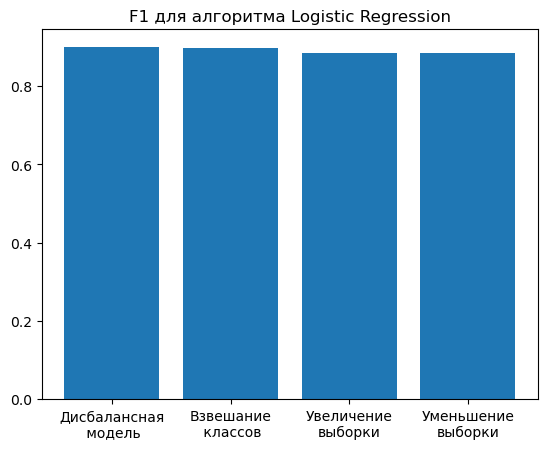

In [20]:
#сравнение f1 меры Logistic Regression несбалансированной модели с техниками
# взвешивания классов, upsampling и downsampling для улучшения метрик качества

plt.title('F1 для алгоритма Logistic Regression');
name_model = ['Дисбалансная' '\n' ' модель',
              'Взвешание' '\n' ' классов',
              'Увеличение' '\n' 'выборки',
              'Уменьшение' '\n' 'выборки']
estimation_f1 = [f1_disbalanced_LR,
                 f1_weight_LR,
                 f1_upsampled_LR,
                 f1_downsampled_LR]
plt.bar(name_model, estimation_f1);



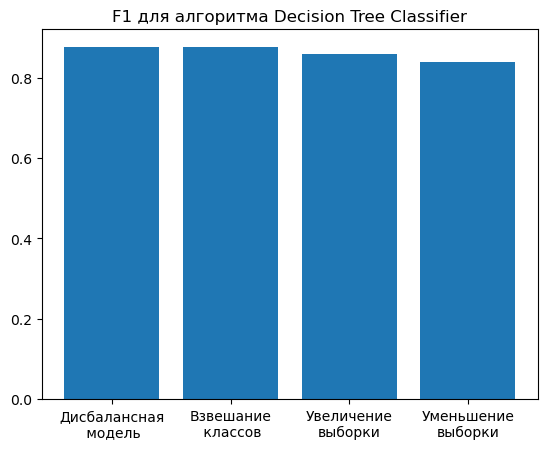

In [21]:
#сравнение метрик меры Decision Tree Classifier несбалансированной модели с техниками
# взвешивания классов, upsampling и downsampling для улучшения метрик качества
plt.title('F1 для алгоритма Decision Tree Classifier');
name_model = ['Дисбалансная' '\n' ' модель',
              'Взвешание' '\n' ' классов',
              'Увеличение' '\n' 'выборки',
              'Уменьшение' '\n' 'выборки']
estimation_f1 = [f1_disbalanced_DT,
                 f1_weight_DT,
                 f1_upsampled_DT,
                 f1_downsampled_DT]
plt.bar(name_model, estimation_f1);

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">

Лучшим решением стало уменьшение выборки в алгоритме Decision Tree Classifier по показателю F1 меры. 

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">

В результате исследования получена лучшая модель с лучшими показателями как по F1-мере <b> Decision Tree Classifier с уменьшенной выборкой.</b>

<div class="alert alert-info">
<font size="4", color = "black"><a name="Тестирование_модели"><h3>Тестирование модели</h3></a></font>
    <br /> 
    <font size="3", color = "black">

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">

 <br>К тестовой выборке применем алгоритм Decision Tree Classifier с уменьшенной выборкой. 

In [22]:
model = DecisionTreeClassifier(random_state=12345, max_depth = 10)
model.fit(features_downsampled, target_downsampled)
predicted_test = model.predict(features_test)
print('Модель дерева решений с уменьшенной выборкой')
print('Точность попадания по классам:', accuracy_score(target_test, predicted_test)) 
print('F1:', f1_score(target_test, predicted_test))
print()

Модель дерева решений с уменьшенной выборкой
Точность попадания по классам: 0.9260493827160494
F1: 0.8633356148756559



<div class="alert alert-info">
<font size="4", color = "black"><a name="Вывод"><h3>Вывод</h3></a></font>
    <br /> 
    <font size="3", color = "black">

 <div class="alert alert-info">
    <font size="3", color = "black">
<br>Было проведено исследование, чтобы построить модель,<b> уйдёт клиент из фитнес-центра в ближайшее время или нет.</b>
        
<br><b> Входные данные </b> - исторические данные о клиентах.
        
        
<br>Были обучены модели логистической регрессии, дерева решений и случайного леса. 
        <br><b>Какая модель лучше?</b>
<br>У каждой — свои достоинства и недостатки. 
<br>У алгоритма классификации - случайный лес, высокое качество (accuracy), но медленная скорость.
<br>У дерева решений, качество (accuracy) ниже, чем у случайного леса, но высокая скорость работы.
<br>У логистической регресии самое низкое качество (accuracy), но высокая скорость работы.
        
<br> Для улучшения метрик качества моделей применены техники взвешивания классов, upsampling и downsampling. После их применения была найдена лучшая модель Decision Tree Classifier с уменьшенной выборкой. 
        
<br><b> Финальные параметры выбранной модели DecisionTreeClassifier(random_state=12345, max_depth = 10)</b>
 
<br><b>Проведена проверка финальной модели тестовой выборкой. </b>
